<a href="https://colab.research.google.com/github/samer-glitch/Federated-Governance-and-Provenance-Scoring-for-Trustworthy-AI-A-Metadata-Ledger-Approach/blob/main/Metadata_Ledger_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

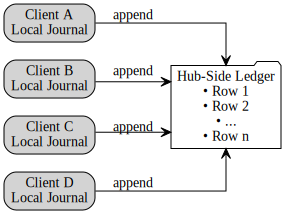

In [6]:
from graphviz import Digraph
from IPython.display import SVG, display

# Build ledger architecture diagram
dot = Digraph(name="MetadataLedger", format="svg")
dot.attr(rankdir="LR", splines="ortho")

# Client journals
dot.node("A", "Client A\nLocal Journal", shape="box", style="rounded,filled", fillcolor="lightgray")
dot.node("B", "Client B\nLocal Journal", shape="box", style="rounded,filled", fillcolor="lightgray")
dot.node("C", "Client C\nLocal Journal", shape="box", style="rounded,filled", fillcolor="lightgray")
dot.node("D", "Client D\nLocal Journal", shape="box", style="rounded,filled", fillcolor="lightgray")

# Hub ledger
dot.node("Hub", "Hub-Side Ledger\n• Row 1\n• Row 2\n• ...\n• Row n", shape="folder", style="filled", fillcolor="white")

# Edges
dot.edge("A", "Hub", label="append", arrowhead="vee")
dot.edge("B", "Hub", label="append", arrowhead="vee")
dot.edge("C", "Hub", label="append", arrowhead="vee")
dot.edge("D", "Hub", label="append", arrowhead="vee")


# Render and display
svg_bytes = dot.pipe(format='svg')
display(SVG(svg_bytes))


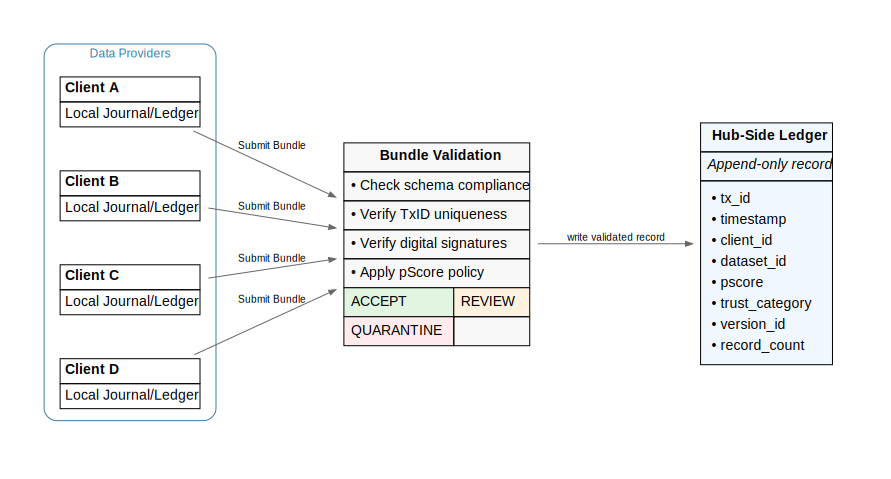

In [18]:
from graphviz import Digraph

dot = Digraph('MetadataLedger', format='png')
dot.attr(rankdir='LR', fontsize='11', fontname='Helvetica', nodesep='0.5', ranksep='0.8')

# Global styling
dot.attr('node', shape='none', fontname='Helvetica')
dot.attr('edge', arrowsize='0.7', fontname='Helvetica')

# Clients
with dot.subgraph(name='cluster_clients') as c:
    c.attr(style='rounded', color='#3a7ca5', label='Data Providers', fontsize='12', fontcolor='#3a7ca5')
    for client in ['Client A', 'Client B', 'Client C', 'Client D']:
        c.node(client, f'''<
            <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
                <TR><TD ALIGN="LEFT"><B>{client}</B></TD></TR>
                <TR><TD ALIGN="LEFT">Local Journal/Ledger </TD></TR>
            </TABLE>>''')

# Hub processing
dot.node('Hub', '''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6" BGCOLOR="#f8f8f8">
        <TR><TD ALIGN="CENTER" COLSPAN="2"><B>Bundle Validation</B></TD></TR>
        <TR><TD ALIGN="LEFT" COLSPAN="2">• Check schema compliance</TD></TR>
        <TR><TD ALIGN="LEFT" COLSPAN="2">• Verify TxID uniqueness</TD></TR>
        <TR><TD ALIGN="LEFT" COLSPAN="2">• Verify digital signatures</TD></TR>
        <TR><TD ALIGN="LEFT" COLSPAN="2">• Apply pScore policy</TD></TR>
        <TR>
            <TD ALIGN="LEFT" BGCOLOR="#e1f5e1">ACCEPT</TD>
            <TD ALIGN="LEFT" BGCOLOR="#fff3e0">REVIEW</TD>
        </TR>
        <TR>
            <TD ALIGN="LEFT" BGCOLOR="#ffebee">QUARANTINE</TD>
            <TD></TD>
        </TR>
    </TABLE>>''')

# Ledger
dot.node('Ledger', '''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6" BGCOLOR="#f0f7ff">
        <TR><TD ALIGN="CENTER"><B>Hub-Side Ledger</B></TD></TR>
        <TR><TD ALIGN="CENTER"><I>Append-only record</I></TD></TR>
        <TR><TD ALIGN="LEFT">
            <TABLE BORDER="0" CELLBORDER="0" CELLSPACING="2">
                <TR><TD ALIGN="LEFT">• tx_id</TD></TR>
                <TR><TD ALIGN="LEFT">• timestamp</TD></TR>
                <TR><TD ALIGN="LEFT">• client_id</TD></TR>
                <TR><TD ALIGN="LEFT">• dataset_id</TD></TR>
                <TR><TD ALIGN="LEFT">• pscore</TD></TR>
                <TR><TD ALIGN="LEFT">• trust_category</TD></TR>
                <TR><TD ALIGN="LEFT">• version_id</TD></TR>
                <TR><TD ALIGN="LEFT">• record_count</TD></TR>
            </TABLE>
        </TD></TR>
    </TABLE>>''')

# Edges
for client in ['Client A', 'Client B', 'Client C', 'Client D']:
    dot.edge(client, 'Hub', label='  Submit Bundle', fontsize='10', color='#666666')

dot.edge('Hub', 'Ledger', label=' write validated record', fontsize='10', color='#666666')

# Layout adjustments
dot.attr('graph', margin='0.2', pad='0.5')

display(dot)